# DESAFIO

Em um artigo publicado no dia 06 de março de 2019, no portal Computer World, o autor fala sobre o profissional que deseja seguir a carreira de analista de dados, o qual deve ter habilidades em: filtrar dados, construir APIs, web scraping e ter conhecimento nas linguagens Git, MySQL e Python. (MOTIM, Raphael Bueno da. Carreira de analista de dados oferece salários de até R$ 12,5 mil. 2019. Disponível em: https://computerworld.com.br/2019/03/06/carreira-de-analista-de-dados-oferece-salarios-de-ate-r-125-mil/. Acesso em: 17 jun. 2020).

Como desenvolvedor em uma empresa de consultoria de software, você foi alocado em uma equipe de marketing analítico em uma marca esportiva, que necessita fazer a coleta das principais notícias do mundo de esporte em um determinado portal. O cliente pedi para que o portal https://globoesporte.globo.com/. O cliente deseja um componente capaz de fazer a extração dos dados em forma tabular, com o seguintes campos: manchete, descrição, link, seção, hora da extração, tempo decorrido da publicação até a hora da extração. O Quadro 4.1 apresenta, visualmente, como os dados devem ser organizados e exibidos.



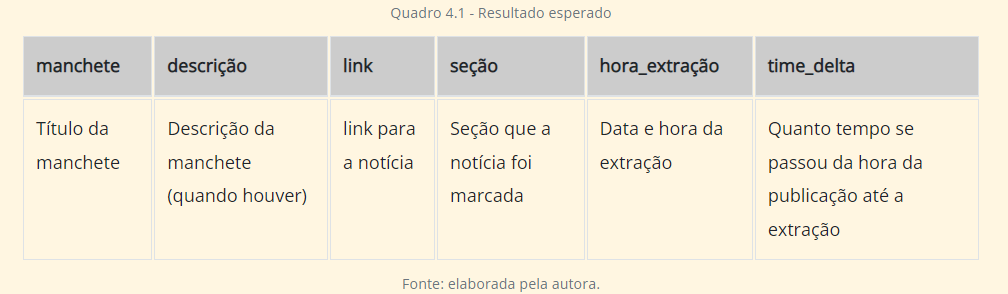

Para extração de todas as informações localize todas as div com atributo 'class':'feed-post-body'. De cada item localizado extraia:

A manchete que ocupa a primeira posição do conteúdo.

O link que pode ser localizado pela tag "a" e pelo atributo "href".

A descrição pode estar na terceira posição conteúdo ou dentro de uma div com atributo 'class':'bstn-related'

A seção está dentro de uma div com atributo 'class':'feed-post-metadata'.

Localize o span com atributo 'class': 'feed-post-metadata-section'.

O tempo decorrido está uma div com atributo 'class':'feed-post-metadata'. 

Localize o span com atributo 'class': 'feed-post-datetime'.

Caso tente acessar o texto de uma tag não localizada, um erro é dado, para evitar esses casos, os campos descrição, seção e time_delta devem ser tratados para esses casos, retornando None (nulo). Agora é com você, faça a implementação e gere um DataFrame com as informações solicitadas.

# Resolução

Para fazer o web scraping solicitado, vamos utilizar as bibliotecas requests, BeautifulSoup, pandas e datetime. As duas primeiras serão usadas para fazer a captura do conteúdo da página, pandas para entregar os resultados em forma estruturada e datetime para marcar o dia e hora da extração.


In [41]:
from datetime import datetime

import requests
from bs4 import BeautifulSoup
import pandas as pd

Com as bibliotecas importadas, vamos acessar o portal e utilizar a propriedade text da biblioteca requests para capturar em formato de string. Em seguida, vamos transformar essa string em formato html, para que possamos localizar as tags de nosso interesse. Na linha 2, registramos o horário da extração. Na linha 5, procuramos todas as tags div com o atributo que nos foi indicado. Essa linha retornará uma lista com cada notícia. Veja que na linha 6 imprimimos quantas notícias foram encontradas e na linha 7 imprimimos o conteúdo da primeira notícia. Lembre-se que contents transforma cada início e final da div em um elemento da lista.

In [42]:
texto_string = requests.get('https://globoesporte.globo.com/').text
hora_extracao = datetime.now().strftime("%d-%m-%Y %H:%M:%S")

bsp_texto = BeautifulSoup(texto_string, 'html.parser')
lista_noticias = bsp_texto.find_all('div', attrs={'class': 'feed-post-body'})
print("Quantidade de manchetes = ", len(lista_noticias))
lista_noticias[0].contents

Quantidade de manchetes =  7


[<div class="feed-post-header with-post-chapeu"><span class="feed-post-header-chapeu">cruzeiro x crb</span></div>,
 <div class="feed-post-body-title gui-color-primary gui-color-hover "><div class="_evt"><a class="feed-post-link gui-color-primary gui-color-hover" elementtiming="text-ssr">📺 Golaço! Edu abre o placar para o Cruzeiro com um belo voleio</a></div></div>,
 <div class="feed-media-wrapper"><a class="feed-post-figure-link gui-image-hover"><div class="bstn-fd-item-cover bstn-fd-video-cover"><picture class="bstn-fd-cover-picture"><img class="bstn-fd-picture-image" elementtiming="image-ssr" loading="lazy" sizes="(min-width: 540px) 50vw, (min-width: 900px) 30vw, 100vw" src="https://s2.glbimg.com/VXWBcJyuhybjLzCrvGLNwUIDhFE=/0x0:720x405/540x304/smart/filters:max_age(3600)/https://s2.glbimg.com/xakh570tD9rv9PUvNsDHTvh0Rdw=/720x0/filters:max_age(3600)/s03.video.glbimg.com/deo/vi/30/07/10650730" srcset="https://s2.glbimg.com/VXWBcJyuhybjLzCrvGLNwUIDhFE=/0x0:720x405/540x304/smart/filters

Dentro dessa estrutura, procurando pelas tags corretas, vamos encontrar todas as informações que foram solicitadas. Pela saída anterior podemos ver que a manchete ocupa a posição 2 da lista de conteúdos, logo para guardar a manchete devemos fazer:

In [43]:
lista_noticias[0].contents[1].text.replace('"', "")

'📺 Golaço! Edu abre o placar para o Cruzeiro com um belo voleio'

Para extração do link para notícia, como ele se encontra também na posição 1 da lista, vamos utilizar o método find('a') para localizá-lo e extrair da seguinte forma:

In [44]:
lista_noticias[0].find('a').get('href')

Para a descrição, como ela pode estar na terceira posição ou em outra tag, vamos ter que testar em ambas e caso não esteja, então retornar None (nulo). Veja a seguir.

In [45]:
descricao = lista_noticias[0].contents[2].text
if not descricao:
  descricao = noticia.find('div', attrs={'class': 'bstn-related'})
  descricao = descricao.text if descricao else None # Somente acessará a propriedade text caso tenha encontrado ("find")
descricao

Para extração da seção e do tempo decorrido, vamos acessar primeiro o atributo 'feed-post-metadata' e guardar em uma variável, para em seguida, dentro desse novo subconjunto, localizar os atributos 'feed-post-datetime' e 'feed-post-metadata-section'. Como existe a possibilidade dessa informação não existir, precisamos garantir que somente acessaremos a propriedade text (linhas 6 e 7) caso tenha encontrando ("find"). Veja a seguir

In [46]:
metadados = lista_noticias[0].find('div', attrs={'class': 'feed-post-metadata'})

time_delta = metadados.find('span', attrs={'class': 'feed-post-datetime'})
secao = metadados.find('span', attrs={'class': 'feed-post-metadata-section'})

time_delta = time_delta.text if time_delta else None
secao = secao.text if secao else None

print('time_delta = ', time_delta)
print('seção = ', secao)

time_delta =  Há 1 hora
seção =   Tempo Real 


Veja que para a notícia 0 extraímos todas as informações solicitadas, mas precisamos extrair de todas, portanto cada extração deve ser feita dentro de uma estrutura de repetição. Para criar um DataFrame com os dados, vamos criar uma lista vazia e a cada iteração apendar uma tupla com as informações extraídas. Com essa lista, podemos criar nosso DataFrame, passando os dados e os nomes das colunas. Veja a seguir:

In [47]:
dados = []

for noticia in lista_noticias:
  manchete = noticia.contents[1].text.replace('"', "")
  link = noticia.find('a').get('href')

  descricao = noticia.contents[2].text
  if not descricao:
    descricao = noticia.find('div', attrs={'class': 'bstn-related'})
    descricao = descricao.text if descricao else None

  metadados = noticia.find('div', attrs={'class': 'feed-post-metadata'})
  time_delta = metadados.find('span', attrs={'class': 'feed-post-datetime'})
  secao = metadados.find('span', attrs={'class': 'feed-post-metadata-section'})

  time_delta = time_delta.text if time_delta else None
  secao = secao.text if secao else None

  dados.append((manchete, descricao, link, secao, hora_extracao, time_delta))

df = pd.DataFrame(dados, columns=['manchete', 'descricao', 'link', 'seção', 'hora_extração', 'time_delta'])
df.head()

,manchete,descricao,link,seção,hora_extração,time_delta
0,📺 Golaço! Edu abre o placar para o Cruzeiro co...,📺 Rafael Silva amplia para a Raposa Há 1 hora,None,Tempo Real,09-06-2022 00:04:15,Há 1 hora
1,📺 Mendoza deixa zagueiro no chão e faz o prime...,📺 Mendoza faz o segundo do Ceará (e dele) no j...,None,Tempo Real,09-06-2022 00:04:15,Há 1 hora
2,📺 Terans vira o jogo para o Athletico com belo...,📺 Pablo empata para o Athletico-PRHá 1 hora📺 J...,None,Tempo Real,09-06-2022 00:04:15,Há 1 hora
3,Cruzeiro supera Corinthians e faz melhor campa...,Orgulho LGBTQIA+: Cruzeiro joga com braçadeira...,https://ge.globo.com/futebol/times/cruzeiro/no...,cruzeiro,09-06-2022 00:04:15,Há 6 minutos
4,Senado Federal aprova a criação da nova Lei Ge...,"Central: Corinthians derrotado, Vasco invicto,...",https://ge.globo.com/df/noticia/2022/06/08/sen...,df,09-06-2022 00:04:15,Há 1 hora


Vamos tornar nossa entrega mais profissional e transformar a solução em uma classe, assim toda vez que for preciso fazer a extração, basta instanciar um objeto e executar o método de extração.

In [56]:
from datetime import datetime

import requests
from bs4 import BeautifulSoup
import pandas as pd

class ExtracaoPortal:
    def __init__(self):
      self.portal = None
    
    def extrair(self, portal):
      self.portal = portal
      texto_string = requests.get('https://globoesporte.globo.com/').text
      hora_extracao = datetime.now().strftime("%d-%m-%Y %H:%M:%S")

      bsp_texto = BeautifulSoup(texto_string, 'html.parser')
      lista_noticias = bsp_texto.find_all('div', attrs={'class':'feed-post-body'})
        
      dados = []

      for noticia in lista_noticias:
          manchete = noticia.contents[1].text.replace('"',"")
          link = noticia.find('a').get('href')

          descricao = noticia.contents[2].text
          if not descricao:
              descricao = noticia.find('div', attrs={'class': 'bstn-related'})
              descricao = descricao.text if descricao else None

          metadados = noticia.find('div', attrs={'class':'feed-post-metadata'})
          time_delta = metadados.find('span', attrs={'class': 'feed-post-datetime'})
          secao = metadados.find('span', attrs={'class': 'feed-post-metadata-section'})

          time_delta = time_delta.text if time_delta else None
          secao = secao.text if secao else None

          dados.append((manchete, descricao, link, secao, hora_extracao, time_delta))

      df = pd.DataFrame(dados, columns=['manchete', 'descrição', 'link', 'seção', 'hora_extração', 'time_delta'])
      return df


In [57]:
df = ExtracaoPortal().extrair("https://globoesporte.globo.com/")
df.head()

,manchete,descrição,link,seção,hora_extração,time_delta
0,"📺 De cabeça, Luan Cândido abre o placar para o...",None,None,Tempo Real,09-06-2022 00:07:56,Agora
1,Cruzeiro supera Corinthians e faz melhor campa...,Orgulho LGBTQIA+: Cruzeiro joga com braçadeira...,https://ge.globo.com/futebol/times/cruzeiro/no...,cruzeiro,09-06-2022 00:07:56,Há 10 minutos
2,Senado Federal aprova a criação da nova Lei Ge...,"Central: Corinthians derrotado, Vasco invicto,...",https://ge.globo.com/df/noticia/2022/06/08/sen...,df,09-06-2022 00:07:56,Há 1 hora
3,Briga entre torcidas de Juventude e Athletico ...,Brigada Militar de Caxias do Sul chegou a info...,https://ge.globo.com/rs/futebol/brasileirao-se...,brasileirão série a,09-06-2022 00:07:56,Há 2 horas
4,"Sem Libra, grupo de 25 clubes forma bloco para...",CBF libera aporte de R$ 8 milhões aos clubes d...,https://ge.globo.com/negocios-do-esporte/notic...,negócios do esporte,09-06-2022 00:07:56,Há 7 horas


# Desafio da Internet

Ganhar habilidade em programação exige estudo e treino (muito treino). Acesse o endereço https://medium.com/data-hackers/como-fazer-web-scraping-em-python-23c9d465a37f e pratique um pouco mais essa habilidade!